# Drawing DAGs

This notebook describes a few tools that are helpful for drawing directed acyclic graphs (DAGs) describing probabilistic graphical models (PGMs), also known as Bayesian networks or Bayes nets (BNs).

This is by no means an exhaustive coverage of the available tools.  It's just a quick overview of a few popular tools I know of.

<hr style="height:2px" />

## Graphviz and the `DOT` language

[Documentation](http://www.graphviz.org/documentation/) is an open-source collection of tools for drawing graphs described using the DOT language. It was originally produced by AT&T. See [Graphviz - Wikipedia](https://en.wikipedia.org/wiki/Graphviz) for background.

**Pros:**
* DOT is an unofficial "industry-standard" language for programmatically describing graphs
* Automatic layout—handy for complex graphs
* Command-line tools well supported (Mac/Linux: install with `brew install graphviz`)
* Scripting language APIs for Python, Ruby, Perl, PHP, Tcl...

**Cons:**
* Visually spare; node labels are just plain text
* Difficult to customize layout
* Multiple Python APIs with varied levels of support
* Limited GUI support

**Example:**

The following DOT code (included in the file "MLM-2Level.dot") describes a simple two-level hierarchical Bayesian model (aka, multilevel model):
```
digraph MLM2Level {
    nodesep="0.9"
    ranksep="0.9 equally"

    node [shape=circle]
    
    // Population-level parameters (hyperparameters):
    PopnParams [label="H"]

    // Sources as a plate (cluster):
    subgraph cluster_source {
        // Source characteristics:
        SourceChar [label="chi_i"]
    
        // Observed data:
        Data [label="D_i"]

        SourceChar -> Data
    }

    PopnParams -> SourceChar
}
```

To render it, run this command:

    dot -Tpng -o MLM-2Level.png MLM-2Level.dot

The rendered DAG is:

![MLM-2Level](MLM-2Level.png)

See below for a more complicated example.

<hr style="height:2px" />

## Python tools

### `Daft`

[Daft](http://daft-pgm.org/) is a Python package for drawing directed and undirected graphs, built by astronomers and designed specifically to render DAGs for PGMs.

**Pros:**
* Uses `matplotlib`; no other special language/library support needed
* Node labels can use LaTeX/MathJax

**Cons:**
* Grid-based layout
* Controlling the sizes of elements is slightly awkward 

**Example:**

Install `daft`:

    pip install daft

The following example is for a regression-like DAG, adapted from an example in the `daft` documentation: [The Quintessential PGM — Daft documentation](http://daft-pgm.org/examples/classic/).

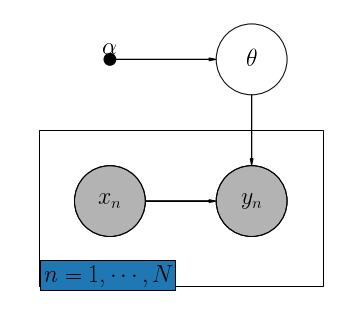

In [12]:
from matplotlib import pyplot, rc
rc("font", family="serif", size=24)
rc("text", usetex=True)

import daft

pyplot.ion()

# Instantiate the PGM.  The first argument defines the grid for
# the node layout.  `grid_unit` specifies cm per grid unit;
# `node_unit` is node size in cm.
pgm = daft.PGM([2.3, 2.05], origin=[0.3, 0.3],
               grid_unit=5., node_unit=2.5)

# Hierarchical parameters.
pgm.add_node(daft.Node("alpha", r"$\alpha$", 1, 2, fixed=True))
pgm.add_node(daft.Node("theta", r"$\theta$", 2, 2))

# Latent variable.
pgm.add_node(daft.Node("x", r"$x_n$", 1, 1, observed=True))

# Data.
pgm.add_node(daft.Node("y", r"$y_n$", 2, 1, observed=True))

# Add in the edges.
pgm.add_edge("alpha", "theta")
pgm.add_edge("x", "y")
pgm.add_edge("theta", "y")

# And a plate.
pgm.add_plate(daft.Plate([0.5, 0.5, 2, 1], label=r"$n = 1, \cdots, N$",
    shift=-0.1))

# Render and save.
pgm.render()
pgm.figure.savefig("classic.png", dpi=150)

It's a little buggy (the plate annotation is not supposed to have a different background). The [`daft` GitHub repo](https://github.com/dfm/daft) shows revisions to the code since the [2016 version on PyPI](https://pypi.python.org/pypi/daft/0.0.4) (which is what `pip` installs). So if you are interested in `daft`, consider installing a current version from GitHub (`pip` can install from .zip package archives).

### `NetworkX`

[NetworkX](https://networkx.github.io/documentation/networkx-1.10/index.html) is a large Python package supporting diverse computing tasks with graphs. Its main goal is *analysis* of graphs, but it does provide support for [graph visualization](https://networkx.github.io/documentation/networkx-1.10/reference/drawing.html). The project has not committed to long-term support of its visualization tools, but multiple options are currently available, including using `matplotlib` and Graphviz via the `PyGraphviz` and `pydot` interfaces. It provides multiple automatic node positioning algorithms.

### Python Graphviz APIs

These Python packages let one describe a DAG in Python, produce DOT code, and render the DOT code.

* [graphviz-python](https://pypi.python.org/pypi/graphviz-python) — The official Graphviz API; not very "pythonic"
* [PyGraphviz](https://pygraphviz.github.io/)
* [graphviz](https://graphviz.readthedocs.io/en/stable/)  
  - [Getting started with Graphviz and Python](http://matthiaseisen.com/articles/graphviz/) (ignore out-of-date comments about PyGraphviz not supporting Python 3)
* [pydot](https://github.com/erocarrera/pydot)

Here's an example from the `graphviz` tutorial linked above:
```python
g2 = gv.Digraph(format='svg')
g2.node('A')
g2.node('B')
g2.edge('A', 'B')
g2.render('img/g2')
```
This produces:

![graphviz](http://matthiaseisen.com/assets/img/articles/graphviz/g2.svg)

<hr style="height:2px" />

## LaTeX using TikZ and `tikz-bayesnet`

[TikZ/PGF - Graphic systems for TeX](http://pgf.sourceforge.net/) is a system for producing graphics in LaTeX documents. TikZ is the "user-friendly" (sort of) interface to the lower-level PGF language.  TikZ can produce very attractive, complex graphics, but has a somewhat steep learning curve.  See [LaTeX/PGF/TikZ @ Wikibooks](https://en.wikibooks.org/wiki/LaTeX/PGF/TikZ), [TikZ package @ ShareLaTeX](https://www.sharelatex.com/learn/TikZ_package) and other third-party tutorials for an introduction.

[`tikz-bayesnet`](https://ctan.org/pkg/tikz-bayesnet?lang=en) is a package providing commands for drawing Bayes nets and other graphs using TikZ.

Both TikZ and `tikz-bayesnet` are included in standard TeX/LaTeX distributions, including TeXLive (the source of MacTeX) and MiKTeX.

**Pros:**
* Full support of LaTeX math for node content and annotations

**Cons:**
* Requires LaTeX; limited output formats (PDF only?)
* Layout control is somewhat limited, semi-automatic

**Example:**  Here is the TikZ code for a two-level hierarchical model:
```
\begin{tikzpicture}[thick]

  % Nodes:
  \node[obs] (data) {$D_i$};
  \node[latent, above=of data] (char) {$\chi_i$};
  \node[latent, above=of char] (popn) {$\theta$};

  % Connections:
  \edge {popn} {char} ; %
  \edge {char} {data} ; %

  % Plate:
  \plate {source} {(char)(data)} {$N$} ;

\end{tikzpicture}
```

The accompanying LaTeX file, "TikZBayesnetDemo.tex", embeds this code in a LaTeX `figure` environment, producing a PDF file: [TikZBayesnetDemo.pdf](TikZBayesnetDemo.pdf).

<hr style="height:2px" />

## D3 for JavaScript

[D3.js](https://d3js.org/) (named for " - Data-Driven Documents") is a hugely popular JavaScript library for data-based visualization in web browsers and JavaScript-based applications. When you see an attractive and dynamic/interactive data visualizations online, it's likely that `d3` is behind it.  See the [`d3` Gallery](https://github.com/d3/d3/wiki/Gallery).  The popular [Plotly](https://plot.ly/) framework for building web-hosted data visualizations uses `d3` behind the scenes (Plotly uses Python behind the scenes to manage web services; it also provides a Python interface for its visualization library).

The `d3` gallery includes some impressive graph visualizations, but not of PGMs.
[d3-bayesian-network](https://libraries.io/github/crealytics/d3-bayesian-network) is a `d3` library for drawing Bayes nets. The library's [live demo @ JSFiddle](http://jsfiddle.net/blacklight/ao6qzvhL/) uses the Monte Hall problem as an example.
Plotly has some [tools for building graph visualizations in Python](https://plot.ly/python/network-graphs/) (this example uses NetworkX), but I'm not aware of it being used for PGMs.

<hr style="height:2px" />

## Tom's OmniGraffle-LaTeXit-DOT workflow

I use three tools for drawing the DAGs in my teaching and research documents:

* [OmniGraffle](https://www.omnigroup.com/omnigraffle) — A commercial (\$60 Standard/\$120 Pro, academic prices) diagramming and graphics design app for macOS.  OmniGraffle is for GUI-based diagram drawing, but it supports much of the DOT language and can import DOT files. I use the Pro version, but DAGs probably do not require any Pro features.
* [LaTeXiT](https://www.chachatelier.fr/latexit/) — A stand-alone LaTeX equation editor, providing rendered PDF objects that can be dragged into OmniGraffle, with linkback support.
* Graphviz (see above)

For simple DAGs (including all of those shown in the course so far), I draw the graph directly in OmniGraffle, using LaTeXiT to generate math symbols. OmniGraffle supports *stencils* (collections of reusable and editable diagram elements; see [Stenciltown](https://stenciltown.omnigroup.com/categories/all/)), but my DAGs use simple elements and I currently don't use a stencil for them.

For complex DAGs, I describe the DAG using DOT and use the `dot` command to produce a starting layout.  I'll often base this off of a hand-drawn DAG that is a mess of haphazardly placed nodes and crossing edges; the idea is to let DOT suggest a good initial layout for the nodes. I then import the DOT file into OmniGraffle, replace the node text with LaTeX symbols using LaTeXiT, and customize the layout interactively.

For example, here's a DOT description of a fairly complex DAG from my research (it has to do with estimating the distances to galaxies from how the expansion of the universe affects their colors):

```
digraph TQPhotoZ {
    nodesep="0.9"
    ranksep="0.9 equally"

    node [shape=circle, fontname="Times Oblique"]

    //**** Global nodes ****

    // cosmological params
    CosmoParams [label="&Chi;"]

    // hyperparams for dist'n of galaxy intrinsic characteristics
    GalHypers [label="&Gamma;"]

    // extinction law parameters
    extinc [label="&xi;"]

    //**** Per-galaxy nodes, training ****

    // galaxy characteristics: luminosity, rest frame spectral shape...
    GalChars_T [label="L, s_0, &gamma;"]

    // galaxy phase space
    GalPosnVel_T [label="r, v"]

    // redshift
    z_T [label="z"]

    // incident spectrum
    ISpec_T [label="S_inc"]

    // fluxes
    Fluxes_T [shape=doublecircle, label="F"]

    // flux data
    DFlux_T [shape=box, label="D_F"]

    // spectral data
    DSpec_T [shape=box, label="D_S"]

    //**** Per-galaxy nodes, query ****

    // galaxy characteristics: luminosity, rest frame spectral shape...
    GalChars_Q [label="L, s_0, &gamma;"]

    // galaxy phase space
    GalPosnVel_Q [label="r, v"]

    // redshift
    z_Q [label="z"]

     // incident spectrum
    ISpec_Q [label="S_inc"]

    // fluxes
    Fluxes_Q [shape=doublecircle, label="F"]

    // flux data
    DFlux_Q [shape=box, label="D_F"]


    // Training galaxy edges
    GalHypers -> GalChars_T
    CosmoParams -> GalPosnVel_T
    CosmoParams -> z_T
    CosmoParams -> ISpec_T
    GalPosnVel_T -> z_T
    z_T -> ISpec_T
    GalChars_T -> ISpec_T
    extinc -> ISpec_T
    ISpec_T -> DSpec_T
    ISpec_T -> Fluxes_T
    Fluxes_T -> DFlux_T

    // Query galaxy edges
    GalHypers -> GalChars_Q
    CosmoParams -> GalPosnVel_Q
    CosmoParams -> z_Q
    CosmoParams -> ISpec_Q
    GalPosnVel_Q -> z_Q
    z_Q -> ISpec_Q
    GalChars_Q -> ISpec_Q
    extinc -> ISpec_Q
    ISpec_Q -> Fluxes_Q
    Fluxes_Q -> DFlux_Q

}
```

Here's how `dot` renders it:

![dot rendering](./PhotoZMLM-TQ-Extended.png "Rendering of DOT file")

I imported that into OmniGraffle, and did substantial editing and annotating (including breaking up a node, deleting a node, and adding some new nodes and plates), eventually producing this:

![OmniGraffle export](./PhotoZMLM-TQ-Omni.png "After editing in OmniGraffle")